#### Overview
1. Import nessary modules and data
2. Understanding data
3. Data Cleaning
4. Data Exploration
5. Feature Engineering
6. Data Preprocessing for Model
7. Basic Model Building

In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
####import data

house = pd.read_csv('train.csv')

#### Understanding data
.info and .describe
Histograms and boxplots
Value counts
Missing Data
Correlation between metrics

In [3]:
####Exploring Dataset

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
house.shape

(1460, 81)

In [7]:
### handling missing values

def missing_vals(house):
    miss     = house.isnull().sum()
    miss_pct  = house.isnull().sum()/house.shape[0]*100
    
    miss_pct  = pd.concat([miss, miss_pct], axis =1)
    miss_pct.reset_index(inplace=True)
    miss_cols = miss_pct.rename(columns={'index':'Column Name', 0:'Missings', 1:'Missing_pct'})
    
    miss_cols = miss_cols[miss_cols.iloc[:,1]!=0].sort_values('Missing_pct', ascending=False).round(1)
    miss_cols.reset_index(inplace=True, drop=True)
    
    return miss_cols 

In [8]:
missing = missing_vals(house)
missing

,Column Name,Missings,Missing_pct
0,PoolQC,1453,99.5
1,MiscFeature,1406,96.3
2,Alley,1369,93.8
3,Fence,1179,80.8
4,FireplaceQu,690,47.3
5,LotFrontage,259,17.7
6,GarageType,81,5.5
7,GarageYrBlt,81,5.5
8,GarageFinish,81,5.5
9,GarageQual,81,5.5


In [9]:
#drop the column with more than 80% missing value

In [10]:
house.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], inplace = True)

In [11]:
#heatmap - find the most correlated variables with sales 
df_corr = house.corr()
cols = df_corr.nlargest(20, 'SalePrice')['SalePrice'].index

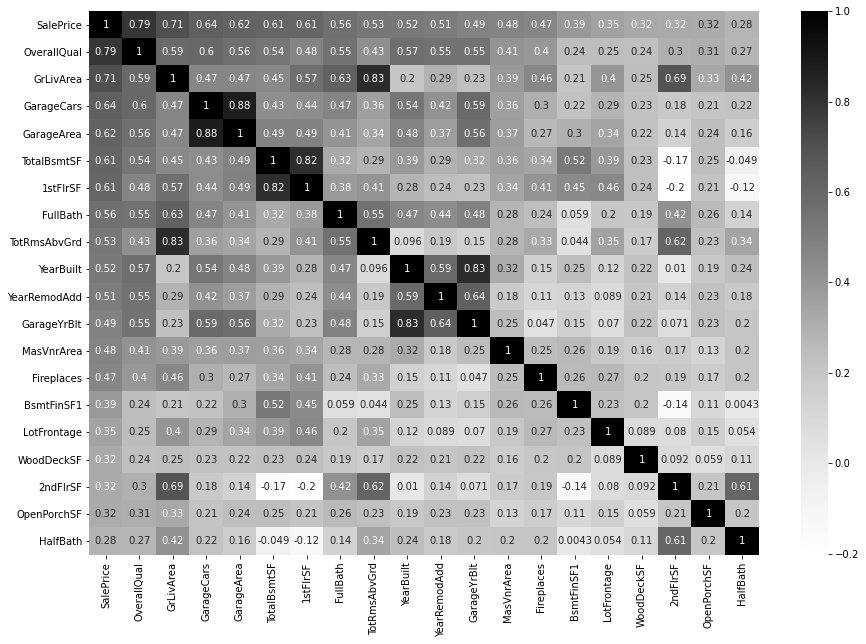

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(house[cols].corr(), cmap='Greys', annot=True)
plt.show()

#multicollinearity problem
Based on heatmap which is shown above, these columns are highly correlated with the dependent column which is SalePrice. There are some other information that we can extract from this heatmap:
GarageArea and GarageCars, GarageYrBlt and MasVnrArea and Fireplaces, TotalBsmtSF and 1stFlrSf have the same effect on producing SalePrice; so we can drop one per each pair.

In [13]:
df = house[cols].drop(['GarageYrBlt', 'GarageCars', '1stFlrSF', 'MasVnrArea'], axis=1)
df['Id'] = house['Id']

In [14]:
df.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
       'HalfBath', 'Id'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   GarageArea    1460 non-null   int64  
 4   TotalBsmtSF   1460 non-null   int64  
 5   FullBath      1460 non-null   int64  
 6   TotRmsAbvGrd  1460 non-null   int64  
 7   YearBuilt     1460 non-null   int64  
 8   YearRemodAdd  1460 non-null   int64  
 9   Fireplaces    1460 non-null   int64  
 10  BsmtFinSF1    1460 non-null   int64  
 11  LotFrontage   1201 non-null   float64
 12  WoodDeckSF    1460 non-null   int64  
 13  2ndFlrSF      1460 non-null   int64  
 14  OpenPorchSF   1460 non-null   int64  
 15  HalfBath      1460 non-null   int64  
 16  Id            1460 non-null   int64  
dtypes: float64(1), int64(16)
memory usage: 194.0 KB


In [16]:
#fill null value
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   GarageArea    1460 non-null   int64  
 4   TotalBsmtSF   1460 non-null   int64  
 5   FullBath      1460 non-null   int64  
 6   TotRmsAbvGrd  1460 non-null   int64  
 7   YearBuilt     1460 non-null   int64  
 8   YearRemodAdd  1460 non-null   int64  
 9   Fireplaces    1460 non-null   int64  
 10  BsmtFinSF1    1460 non-null   int64  
 11  LotFrontage   1460 non-null   float64
 12  WoodDeckSF    1460 non-null   int64  
 13  2ndFlrSF      1460 non-null   int64  
 14  OpenPorchSF   1460 non-null   int64  
 15  HalfBath      1460 non-null   int64  
 16  Id            1460 non-null   int64  
dtypes: float64(1), int64(16)
memory usage: 194.0 KB


In [18]:
df.head()

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,Id
0,208500,7,1710,548,856,2,8,2003,2003,0,706,65.0,0,854,61,1,1
1,181500,6,1262,460,1262,2,6,1976,1976,1,978,80.0,298,0,0,0,2
2,223500,7,1786,608,920,2,6,2001,2002,1,486,68.0,0,866,42,1,3
3,140000,7,1717,642,756,1,7,1915,1970,1,216,60.0,0,756,35,0,4
4,250000,8,2198,836,1145,2,9,2000,2000,1,655,84.0,192,1053,84,1,5


In [19]:
#EDA and Data Cleaning
#Data Visualiztion
#Discrete Data

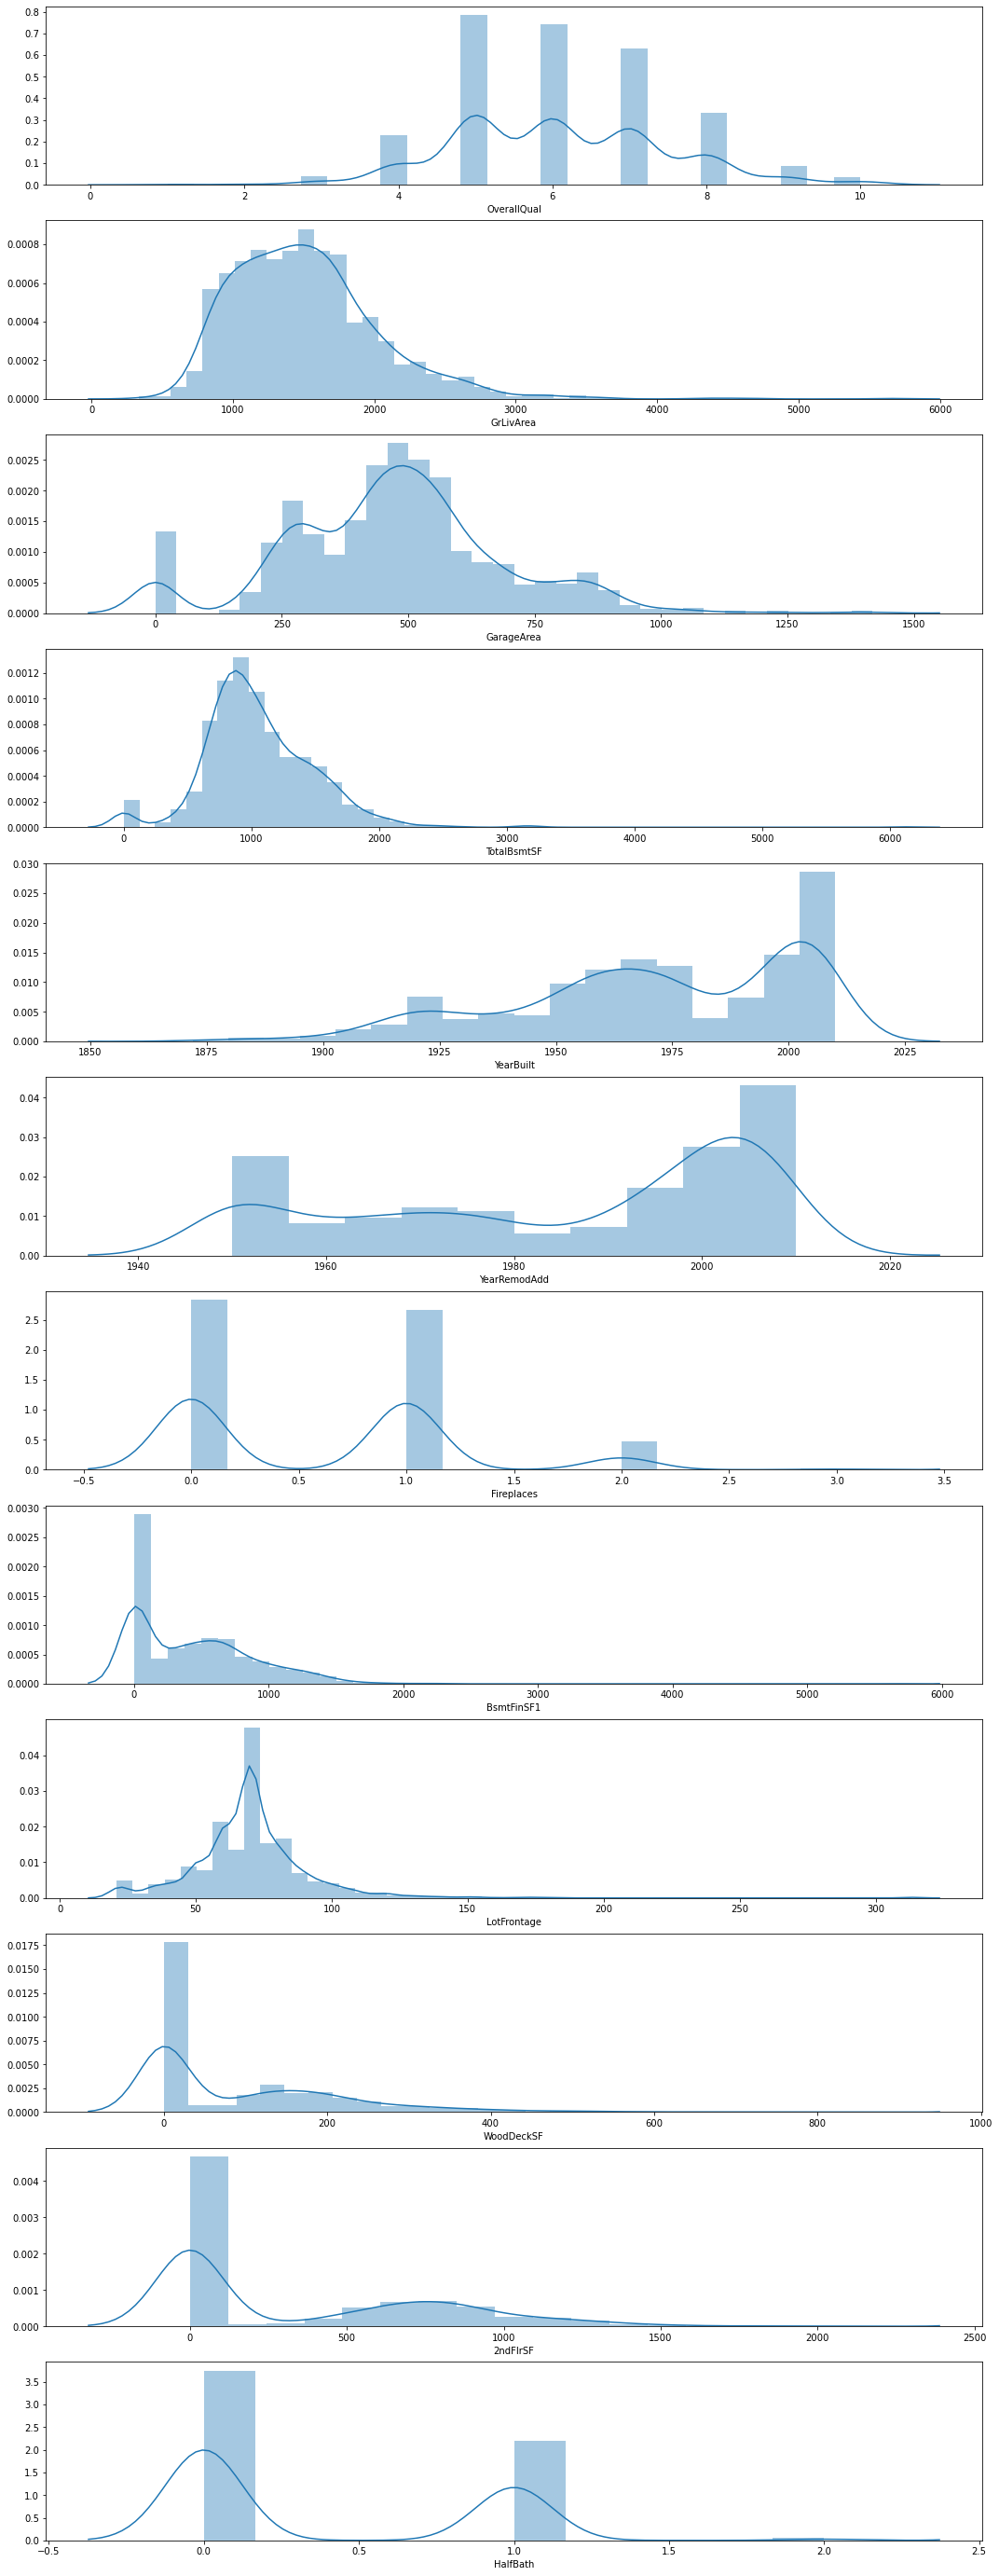

In [20]:
#plot the distribution
fig, axs = plt.subplots(nrows=12, figsize=(18,50))
# Plot histograms regaridng retained drivers
sns.distplot((df["OverallQual"]), ax=axs[0])
sns.distplot((df["GrLivArea"]), ax=axs[1])
sns.distplot((df["GarageArea"]), ax=axs[2])
sns.distplot((df["TotalBsmtSF"]), ax=axs[3])
sns.distplot((df["YearBuilt"]), ax=axs[4])
sns.distplot((df["YearRemodAdd"]), ax=axs[5])
sns.distplot((df["Fireplaces"]), ax=axs[6])
sns.distplot((df["BsmtFinSF1"]), ax=axs[7])
sns.distplot((df["LotFrontage"]), ax=axs[8])
sns.distplot((df["WoodDeckSF"]), ax=axs[9])
sns.distplot((df["2ndFlrSF"]), ax=axs[10])
sns.distplot((df["HalfBath"]), ax=axs[11])
plt.show()

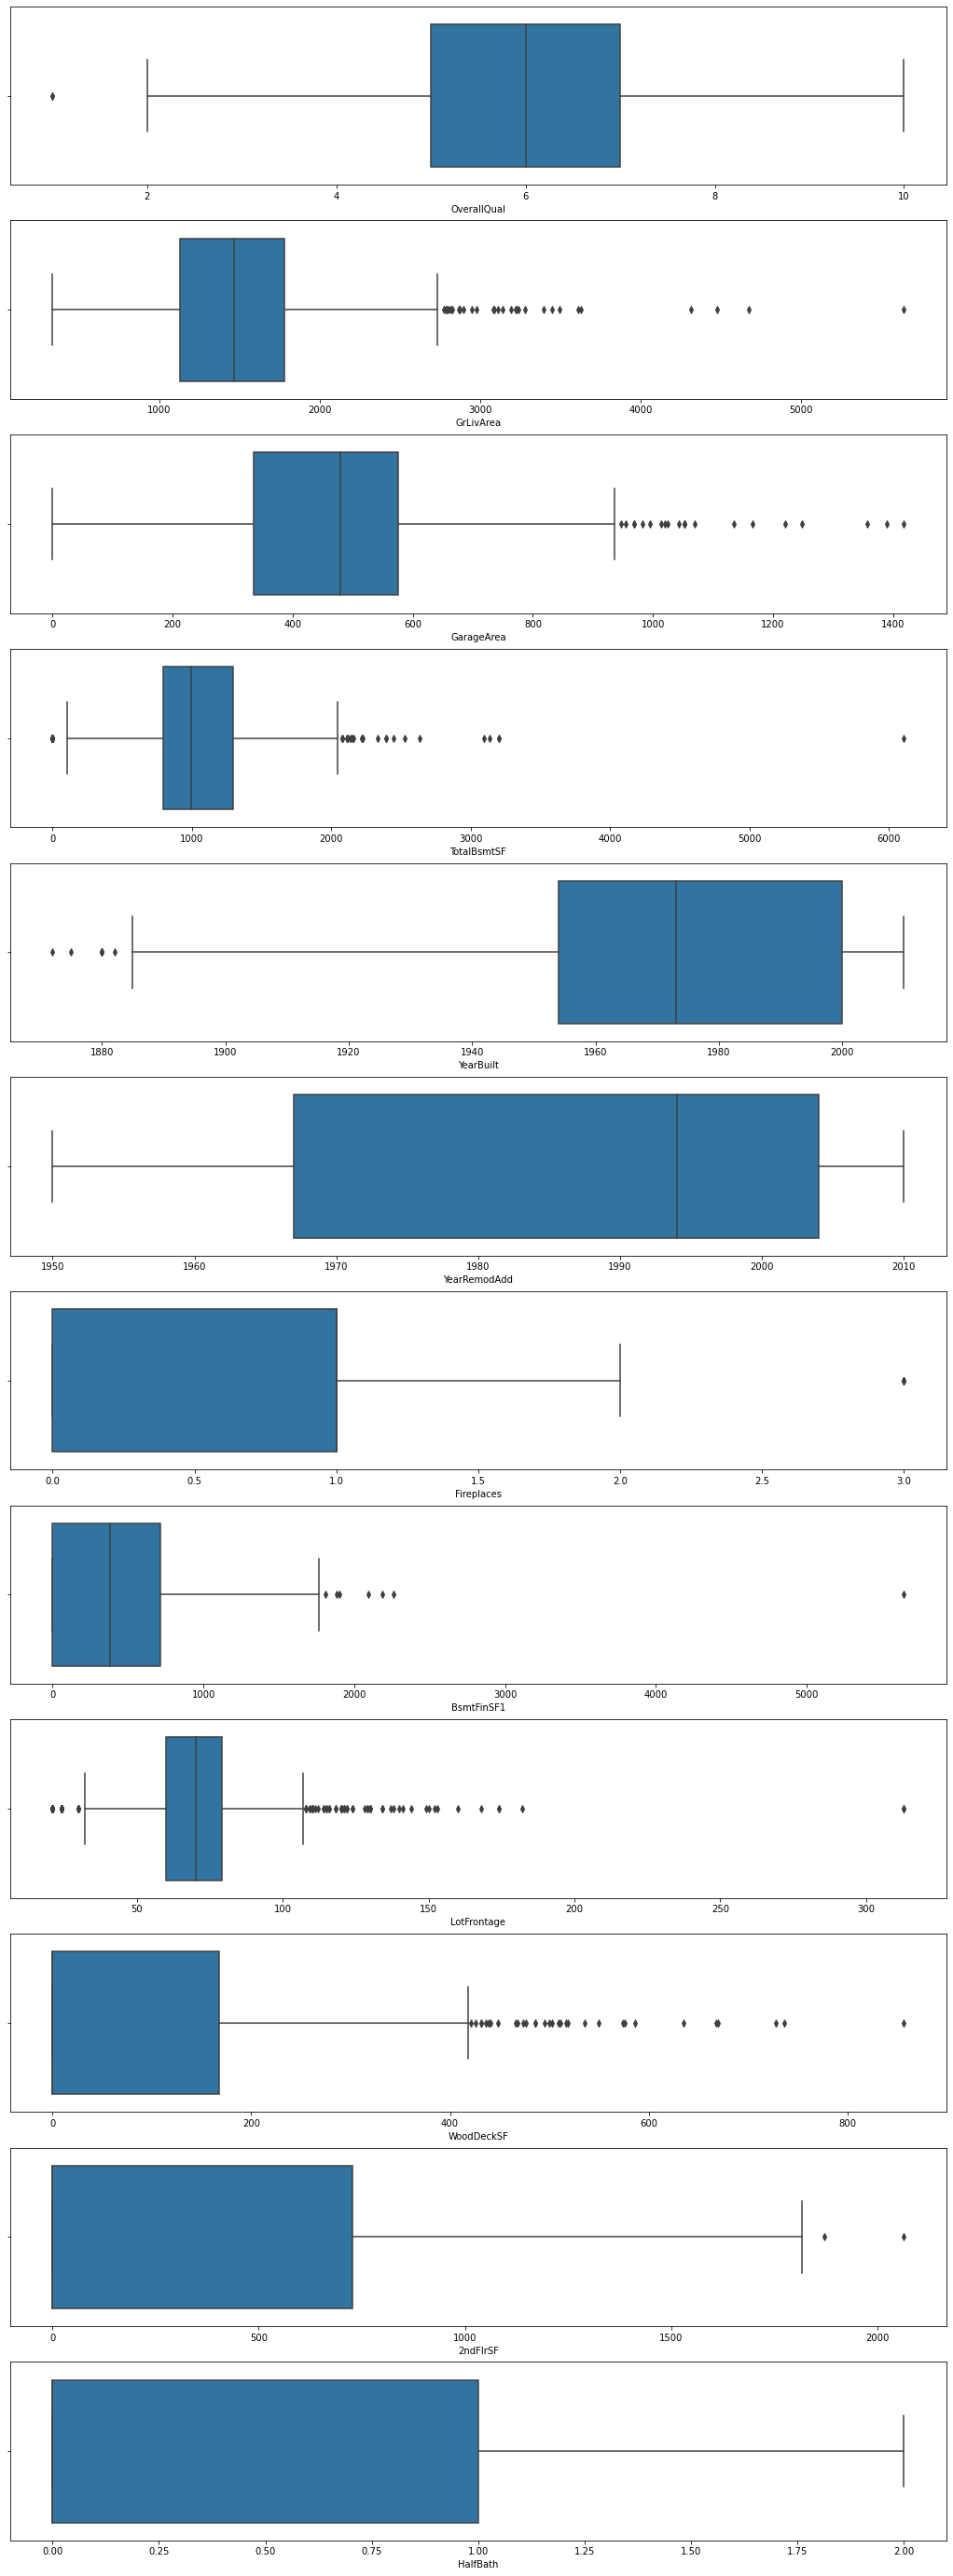

In [21]:
#plot the distribution
fig, axs = plt.subplots(nrows=12, figsize=(18,50))
# Plot boxplots to see outliers
sns.boxplot((df["OverallQual"]), ax=axs[0])
sns.boxplot((df["GrLivArea"]), ax=axs[1])
sns.boxplot((df["GarageArea"]), ax=axs[2])
sns.boxplot((df["TotalBsmtSF"]), ax=axs[3])
sns.boxplot((df["YearBuilt"]), ax=axs[4])
sns.boxplot((df["YearRemodAdd"]), ax=axs[5])
sns.boxplot((df["Fireplaces"]), ax=axs[6])
sns.boxplot((df["BsmtFinSF1"]), ax=axs[7])
sns.boxplot((df["LotFrontage"]), ax=axs[8])
sns.boxplot((df["WoodDeckSF"]), ax=axs[9])
sns.boxplot((df["2ndFlrSF"]), ax=axs[10])
sns.boxplot((df["HalfBath"]), ax=axs[11])
plt.show()

In [22]:
# replace outliers
from scipy.stats import zscore

def replace_outliers_z_score(dataframe, column, Z=3):

    
    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])

# Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

# Replace with mean values

    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

# Print message

    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [23]:
#replace continues variables outliers with mean in train data
df = replace_outliers_z_score(df,"OverallQual")
df = replace_outliers_z_score(df,"GrLivArea")
df = replace_outliers_z_score(df,"GarageArea")
df = replace_outliers_z_score(df,"TotalBsmtSF")
df = replace_outliers_z_score(df,"TotRmsAbvGrd")
df = replace_outliers_z_score(df,"BsmtFinSF1")
df = replace_outliers_z_score(df,"LotFrontage")
df = replace_outliers_z_score(df,"WoodDeckSF")
df = replace_outliers_z_score(df,"2ndFlrSF")
df = replace_outliers_z_score(df,"OpenPorchSF")

Replaced: 2  outliers in  OverallQual
Replaced: 16  outliers in  GrLivArea
Replaced: 7  outliers in  GarageArea
Replaced: 10  outliers in  TotalBsmtSF
Replaced: 12  outliers in  TotRmsAbvGrd
Replaced: 6  outliers in  BsmtFinSF1
Replaced: 16  outliers in  LotFrontage
Replaced: 22  outliers in  WoodDeckSF
Replaced: 4  outliers in  2ndFlrSF
Replaced: 27  outliers in  OpenPorchSF


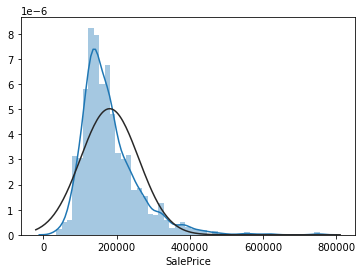

In [24]:
#Normalizing data
from scipy import stats
sns.distplot(df['SalePrice'], fit=stats.norm)

In [25]:
#Prices are not normally distributed, we transform them to be normal by using log transformation

In [26]:
df['SalePrice'] = np.log(df['SalePrice'])

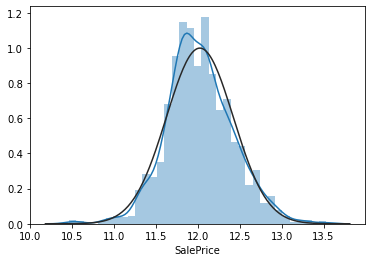

In [27]:
sns.distplot(df['SalePrice'], fit=stats.norm)

In [28]:
# checking if there are any duplicated values
print("num of duplicates: ", df.duplicated().sum(), "\n-------------------------")

num of duplicates:  0 
-------------------------


In [29]:
df.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
       'HalfBath', 'Id'],
      dtype='object')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Sklearn regression algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Sklearn regression model evaluation functions
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

1. Linear Regression
2. Decision Tree
3. Random Forest
4. KNN
5. SVM

In [31]:
# Modeling and Evaluatioon
#create train and test set for x and y
X = df.drop(['SalePrice', 'Id'], axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7 )

In [32]:
#Standardscale the dataset

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Build some models and check them against training data using MAE, RMSE and R2
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), KNeighborsRegressor(), SVR()]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_train, predictions))
    print("    RMSE", sqrt(mean_squared_error(y_train, predictions)))
    print("    R2", r2_score(y_train, predictions))

LinearRegression
    MAE 0.10291878189465724
    RMSE 0.14888391131312223
    R2 0.8591102566487682
DecisionTreeRegressor
    MAE 0.00022486882573705542
    RMSE 0.0028646652757296854
    R2 0.9999478407177724
RandomForestRegressor
    MAE 0.04040169378708334
    RMSE 0.06066021857231781
    R2 0.9766120702582923
KNeighborsRegressor
    MAE 0.09713292928397774
    RMSE 0.13875533104064355
    R2 0.8776276797320525
SVR
    MAE 0.07664718635747168
    RMSE 0.1036357823880349
    R2 0.9317341818229748


In [34]:
#from the above graph, dicision tree model has a good performance on the dataset

In [35]:
# Labels are the values we want to predict
labels = np.array(df['SalePrice'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop(columns = ['SalePrice','Id'], axis = 1)
# Saving feature names for later use
feature_list = list(df.columns)
# Convert to numpy array
features = np.array(features)

In [36]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                                                            labels, test_size = 0.2, random_state = 42)

In [37]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1168, 15)
Training Labels Shape: (1168,)
Testing Features Shape: (292, 15)
Testing Labels Shape: (292,)


Establish Baseline
Before we can make and evaluate predictions, we need to establish a baseline, a sensible measure that we hope to beat with our model. If our model cannot improve upon the baseline, then it will be a failure and we should try a different model or admit that machine learning is not right for our problem. The baseline prediction for our case can be the historical max temperature averages. In other words, our baseline is the error we would get if we simply predicted the average max temperature for all days.

In [38]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('SalePrice')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.99


In [39]:
#decision tree model evaluation
dt = DecisionTreeRegressor(random_state = 42)
# Train the model on training data
dt.fit(train_features, train_labels)

DecisionTreeRegressor(random_state=42)

In [40]:
# Use the forest's predict method on the test data
predictions_dt = dt.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions_dt - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

Mean Absolute Error: 0.16 dollars.


In [41]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.68 %.


In [42]:
del feature_list[0]
del feature_list[-1]

In [49]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
from sklearn import tree
import graphviz

dt_df = tree.export_graphviz(dt, out_file=None, 
                                feature_names=feature_list,  
                                filled=True)
graphviz.Source(dt_df, format="png") 

In [50]:
# Get numerical feature importances
importances = list(dt.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: OverallQual          Importance: 0.57
Variable: GrLivArea            Importance: 0.14
Variable: TotalBsmtSF          Importance: 0.09
Variable: GarageArea           Importance: 0.04
Variable: BsmtFinSF1           Importance: 0.04
Variable: YearBuilt            Importance: 0.03
Variable: YearRemodAdd         Importance: 0.02
Variable: LotFrontage          Importance: 0.02
Variable: 2ndFlrSF             Importance: 0.02
Variable: FullBath             Importance: 0.01
Variable: Fireplaces           Importance: 0.01
Variable: WoodDeckSF           Importance: 0.01
Variable: OpenPorchSF          Importance: 0.01
Variable: TotRmsAbvGrd         Importance: 0.0
Variable: HalfBath             Importance: 0.0


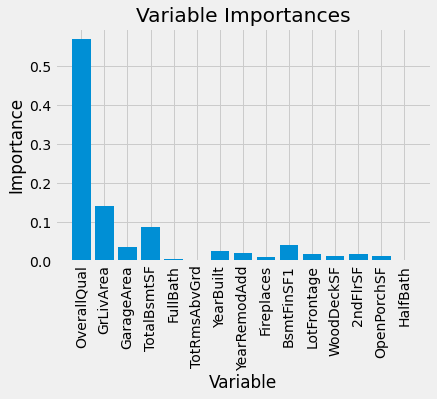

In [51]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [53]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [55]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions_rf - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

Mean Absolute Error: 0.11 dollars.


In [56]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.1 %.


In [58]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small_rf = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small_rf, out_file = 'small_tree_rf.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree_rf.dot')
graph.write_png('small_tree_rf.png');

In [59]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: OverallQual          Importance: 0.57
Variable: GrLivArea            Importance: 0.13
Variable: TotalBsmtSF          Importance: 0.07
Variable: GarageArea           Importance: 0.06
Variable: YearBuilt            Importance: 0.04
Variable: BsmtFinSF1           Importance: 0.04
Variable: YearRemodAdd         Importance: 0.02
Variable: LotFrontage          Importance: 0.02
Variable: TotRmsAbvGrd         Importance: 0.01
Variable: Fireplaces           Importance: 0.01
Variable: WoodDeckSF           Importance: 0.01
Variable: 2ndFlrSF             Importance: 0.01
Variable: OpenPorchSF          Importance: 0.01
Variable: FullBath             Importance: 0.0
Variable: HalfBath             Importance: 0.0


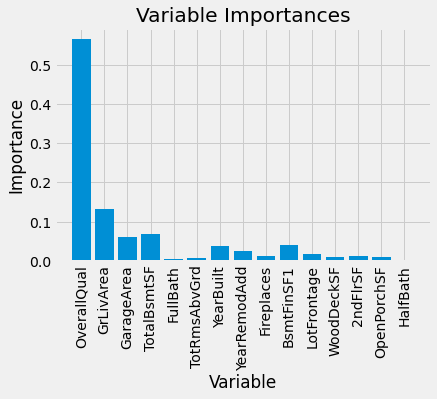

In [60]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');